# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
len(np.ones([10, 5]))

10

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return ((X.dot(w) - y) ** 2).sum() / len(X) 
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return X.T.dot(X.dot(w) - y) * 2 / len(X)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_list = [w_init]
    for i in range(n_iterations):
        w_list.append(w_list[-1] - lr * loss.calc_grad(X, y, w_list[-1]))
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    # plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8)

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    # plt.show()

> Функция была немного изменена, чтобы рисовать составные графики

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

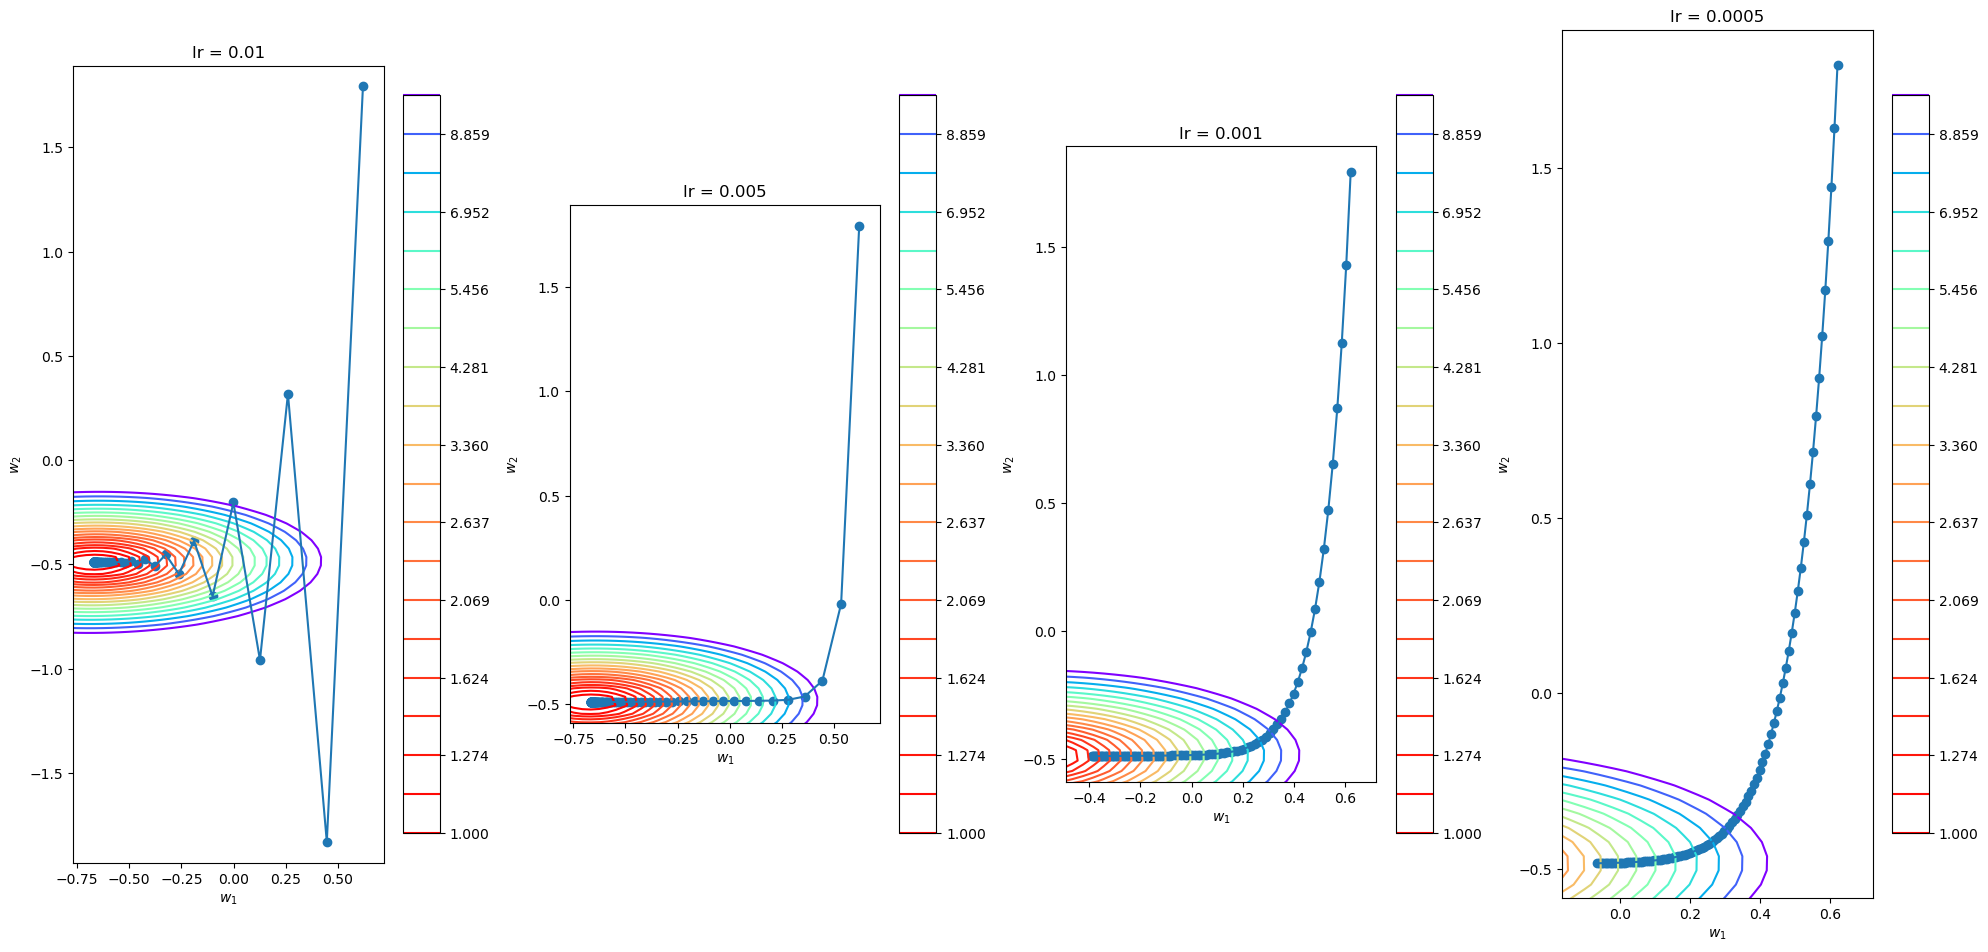

In [10]:
plt.figure(figsize=(20, 10))
lr_list = [0.01, 0.005, 0.001, 0.0005]
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plot_gd(gradient_descent(w_init, X, y, loss, lr_list[i]), X, y, loss)
    plt.title(f'lr = {lr_list[i]}')
plt.tight_layout()
plt.show()

> При большой величине шага градиентный спуск способен лучше выходить из локальных мимимумов, при этом тракетория спуска становится более ломанной и резкой. Нужно учитывать, что при если длина шага к концу обучения будет оставаиться слишком высокой, будет шанс промахнуться и не дойти ло текущего минимума.   
> При маленькой длине шага ситуация обратная - траектория плавная, но и из локальных минимумов выходить сложнее. Также при недостаточном количестве итераций мы можем банально не дойти до минимума, как видно на 3 и 4 графиках.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 100) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_list = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w_list.append(w_list[-1] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w_list[-1]))
    return w_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

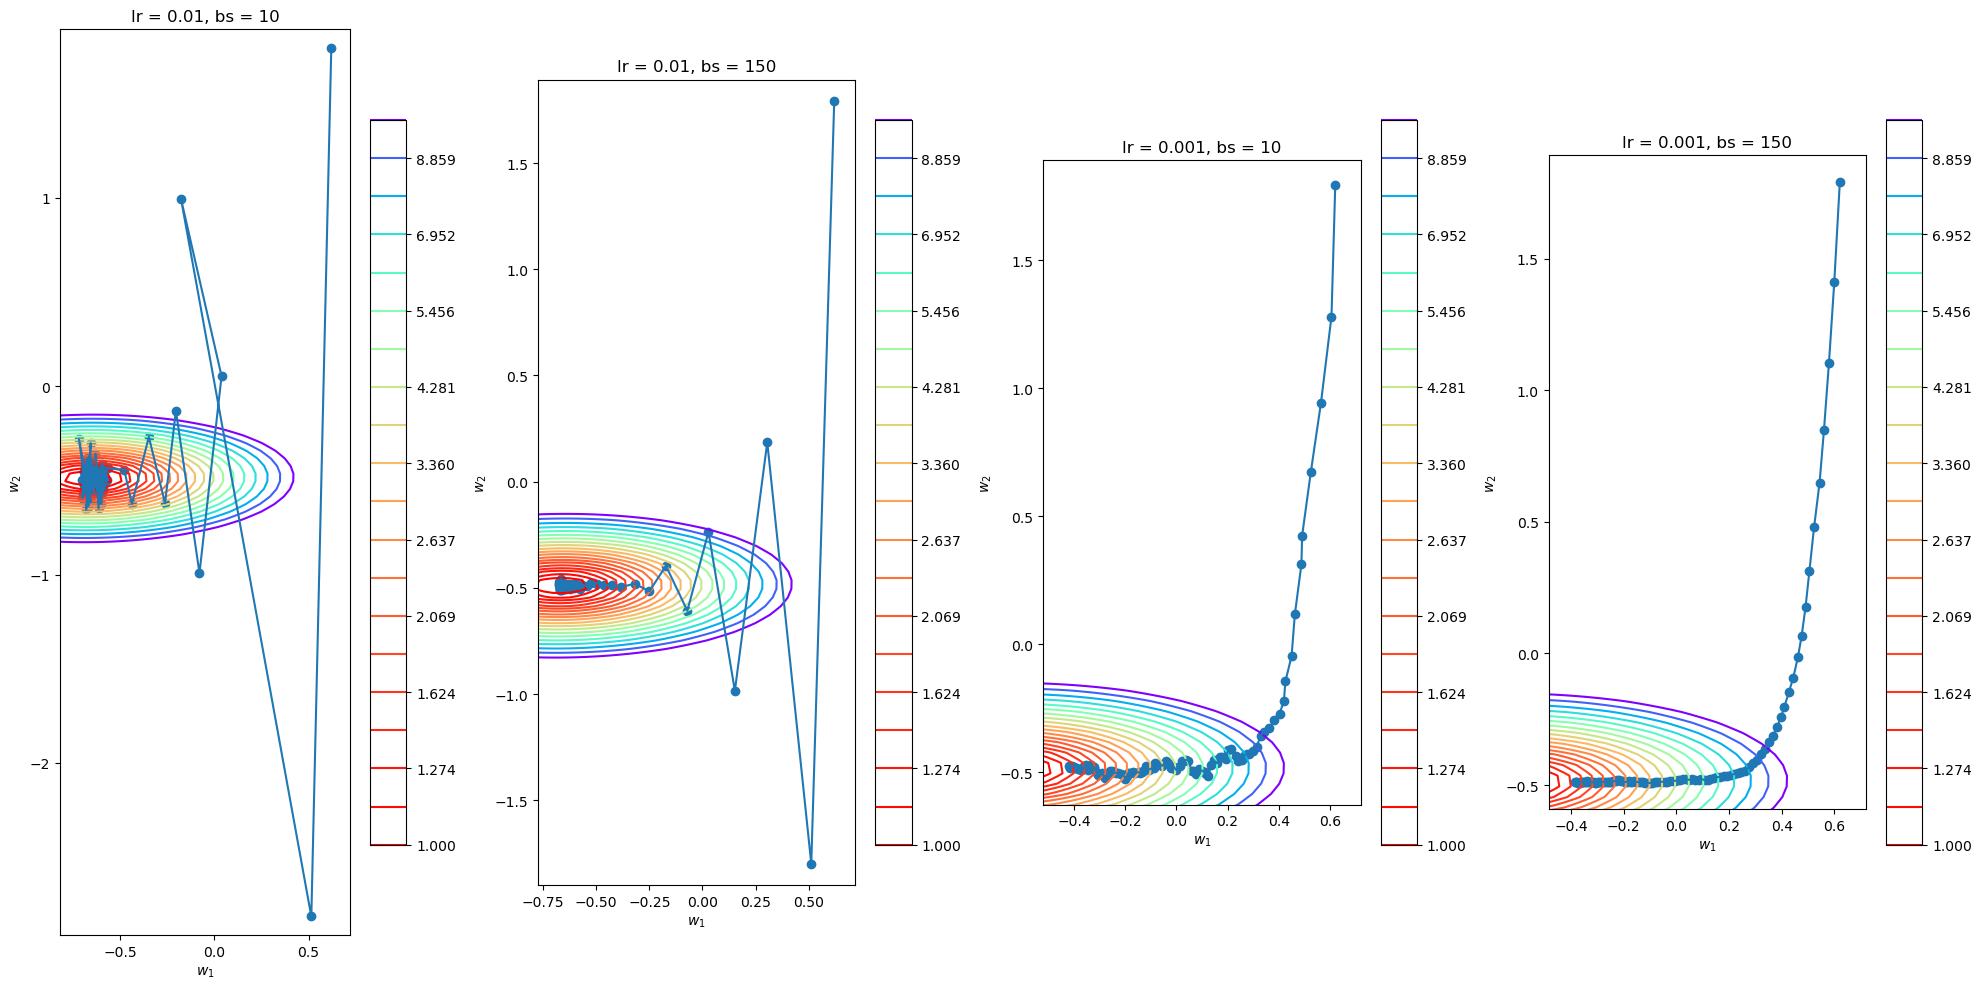

In [12]:
plt.figure(figsize=(20, 10))
lr_bs_list = [(0.01, 10),
              (0.01, 150),
              (0.001, 10),
              (0.001, 150)]
np.random.seed(42)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr_bs_list[i][0], lr_bs_list[i][1]), X, y, loss)
    plt.title(f'lr = {lr_bs_list[i][0]}, bs = {lr_bs_list[i][1]}')
plt.tight_layout()
plt.show()

> Размер шага влияет на поведение стохастического градиентного спуска также, как и на обычный. Тут особо добавить нечего.   
> А вот размер батча довольно сильно меняет поведение. Траектория, вычисленная на основе маленького батча, может сильно отличаться от реальной, поэтому графики 1 и 3, где размер батча всего 10, немного "дрожат" из-за неправильного определения траектории. Соотвественно, при больших батчах эта проблема нивелируется и графики снова становятся более "орагнизованными". При этом они все еще не так плавны, как у классического градиентного спуска.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                                loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 100) -> List[
    np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_list = [w_init]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        step = lr * (1 / (2 + i)) ** p
        w_list.append(w_list[-1] - step * loss.calc_grad(X[batch_indices], y[batch_indices], w_list[-1]))
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

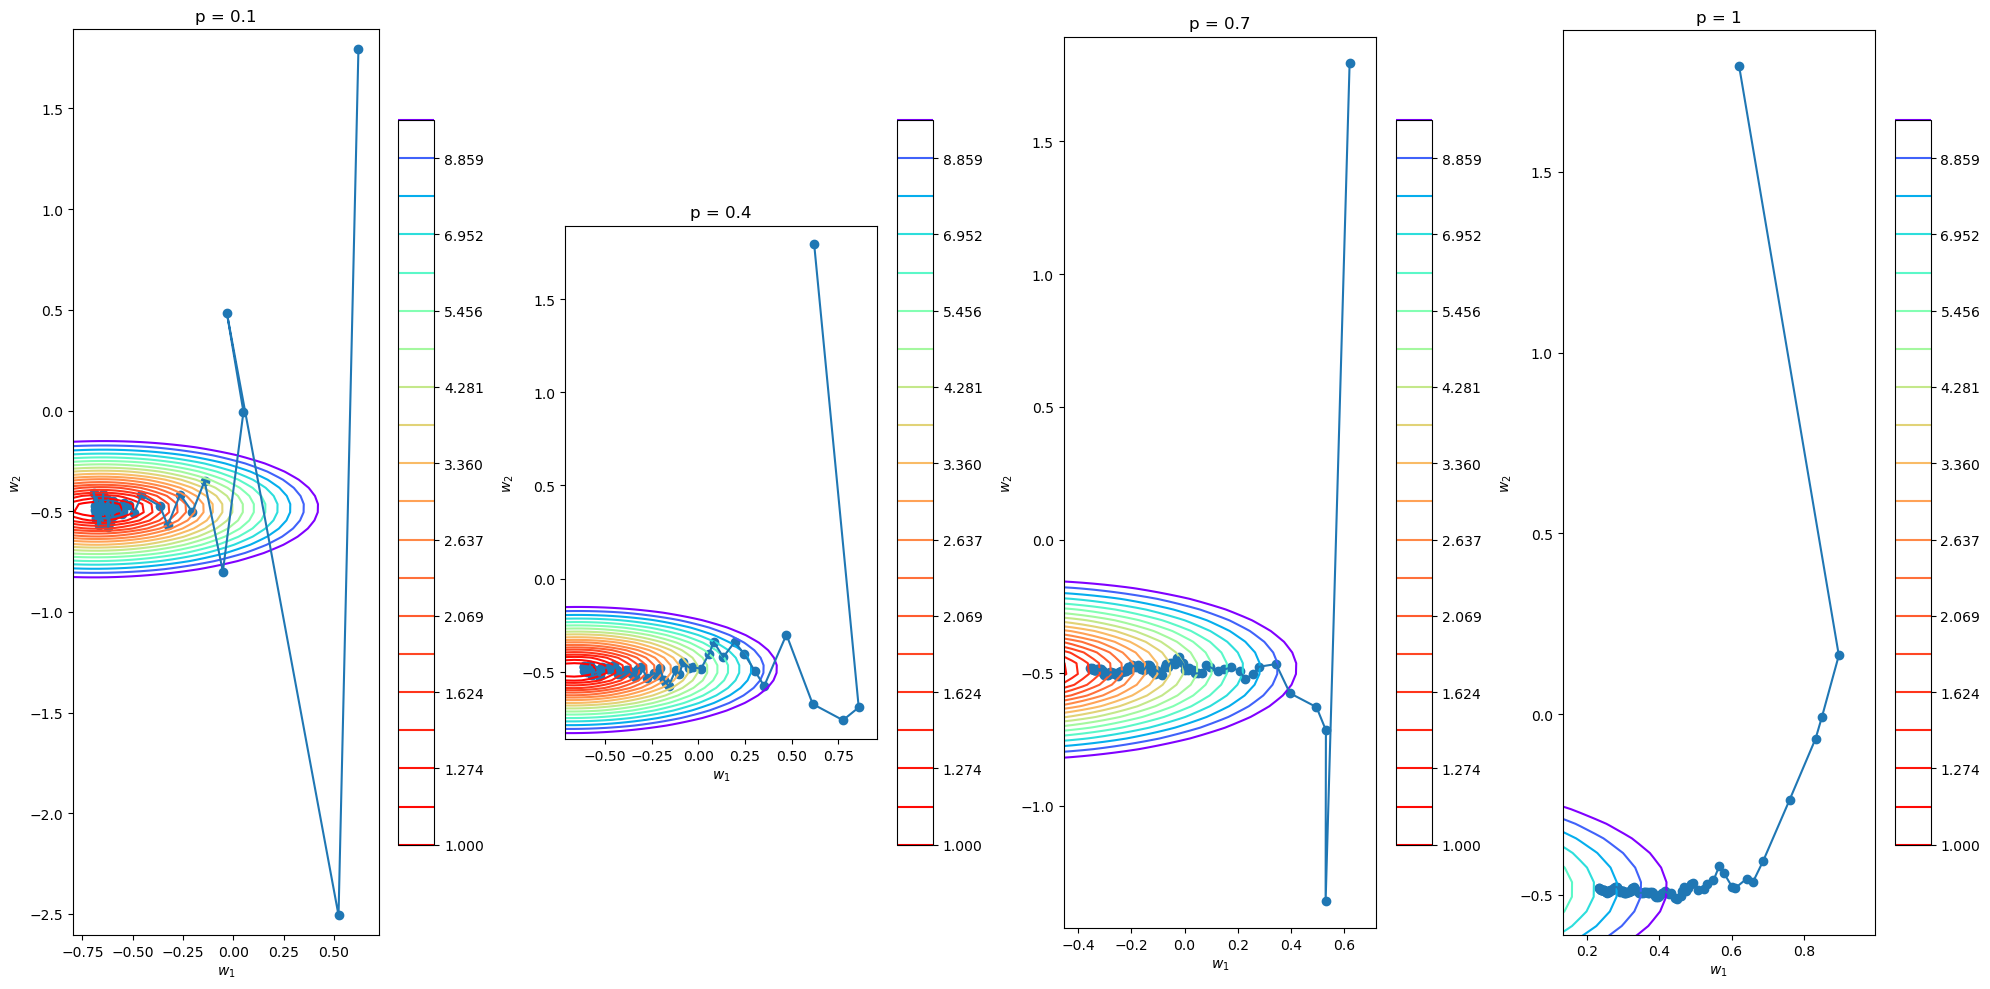

In [14]:
plt.figure(figsize=(20, 10))
p_list = [0.1, 0.4, 0.7, 1]
np.random.seed(42)
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p_list[i]), X, y, loss)
    plt.title(f'p = {p_list[i]}')
plt.tight_layout()
plt.show()

> Чем больше `p`, тем быстрее замедляется длина шага. Если на первых двух графиках, градиентый спуск, пусть и хаотично, доходит до минимума, то на последних двух из-за слишком быстрого замедления он банально не успевает до него дойти. 

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

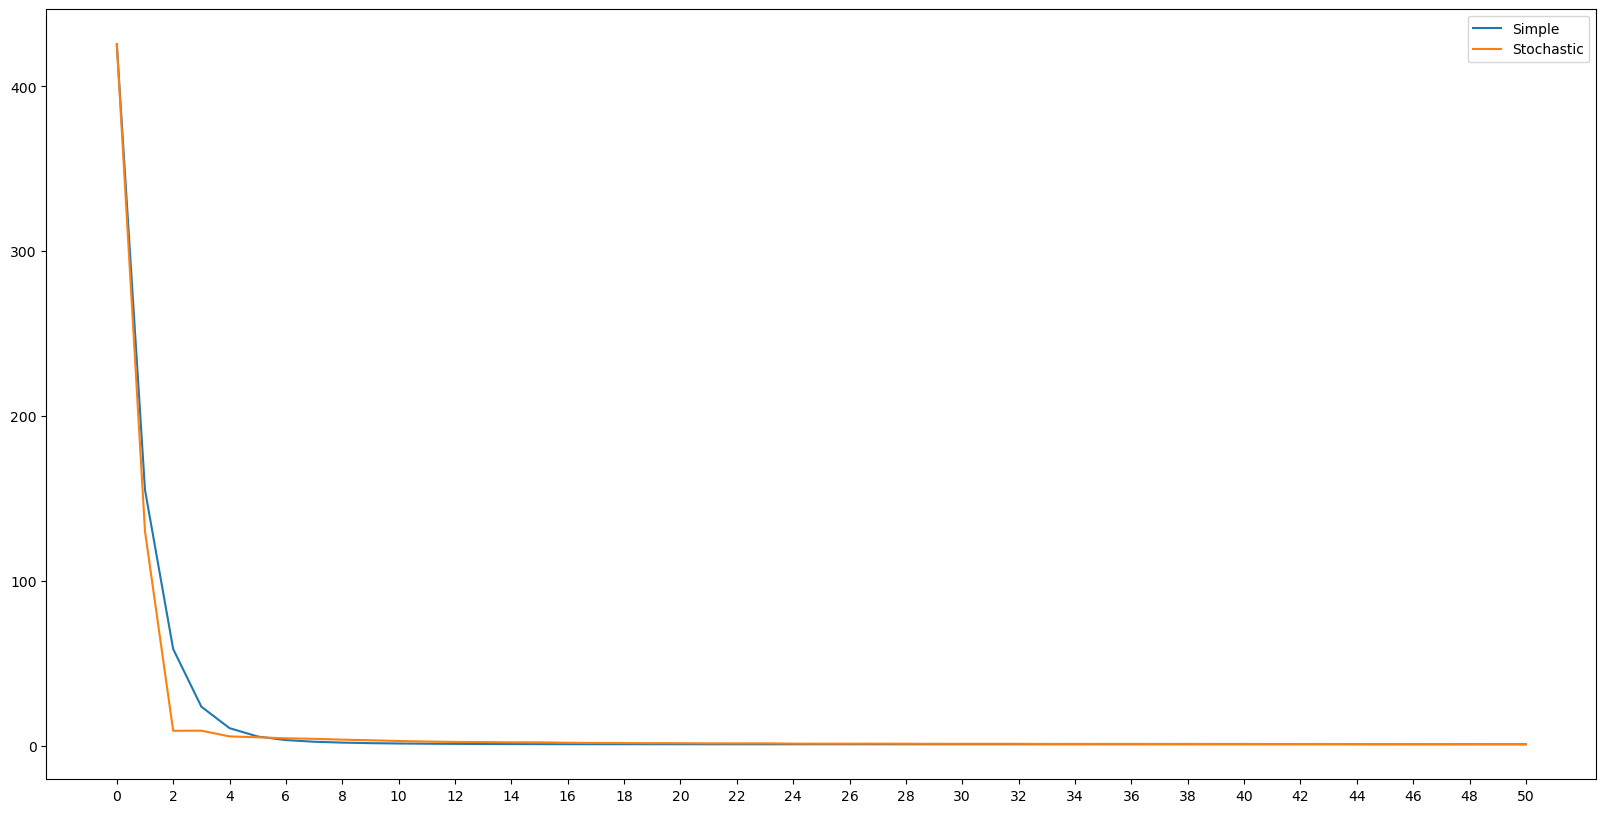

In [15]:
iterations = 50
w_simple_gd = gradient_descent(w_init, X, y, loss, 0.01, iterations)
w_simple = [loss.calc_loss(X, y, w_cur) for w_cur in w_simple_gd]

np.random.seed(42)
w_stoch_gd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.4, iterations)
w_stoch = [loss.calc_loss(X, y, w_cur) for w_cur in w_stoch_gd]

xticks = np.arange(iterations + 1)
plt.figure(figsize=(20, 10))
plt.plot(xticks, w_simple, label='Simple')
plt.plot(xticks, w_stoch, label='Stochastic')
plt.xticks(xticks[::2])

plt.legend()
plt.show()

> В нашем случае нам повезло - уже на второй итерации SGD смог почти достичь минимума и обогнать классический GD. Однако стоит учитывать, что стохастический градиентный спуск, собственно говоря, стохастический. Вполне вероятно, что если бы на первой итерации батч был другой, мы бы не добились тех же результатов. Так что единственным преимуществом алгоритма можно назвать только более высокую производительность, которая на таком маленьком датасете даже не проявляется (на больших же датасетах разница может быть колоссальной)

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, n_iterations:int = 1000, lr: float = 0.1) -> None:
        self.n_iterations = n_iterations # для бонусного задания
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.normal(-2, 2, X.shape[1])
        self.traj = gradient_descent(w_init, X, y, self.loss, self.lr, self.n_iterations) # для бонусного задания с алгоритмом имитации отжига
        self.w = self.traj[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [20]:
# сразу выбросим столбец 'index' - никакой полезной информации он не несет
X_raw = X_raw.drop(columns=['index'])

In [21]:
(X_raw.isna() | (X_raw == '')).any(axis=None)

True

In [22]:
# числовые пропущенные значения заполним средними по соотвествующему столбцу
from sklearn.impute import SimpleImputer

X_num = X_raw.select_dtypes(exclude=object)
X_num_filled = pd.DataFrame(SimpleImputer().fit_transform(X_num), columns=X_num.columns)
X_num_filled.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0


In [23]:
# сразу же нормализуем
from sklearn.preprocessing import StandardScaler

X_num_filled_norm = pd.DataFrame(StandardScaler().fit_transform(X_num_filled), columns=X_num_filled.columns)
X_num_filled_norm.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779


In [24]:
# категориальные пропущенные значения заполним пустыми строками
X_cat = X_raw.select_dtypes(include=object)
X_cat_filled = X_cat.fillna('')
X_cat_filled.head()

,2,3,4,5,6,7,8,14,15,17
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [25]:
# сразу же делаем One-Hot Encoding
X_cat_filled_ohe = pd.get_dummies(X_cat_filled, drop_first=True)
X_cat_filled_ohe.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# объединяем признаки обратно
X_processed = X_num_filled_norm.join(X_cat_filled_ohe)
X_processed.head()

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433435,0.675938,...,0,0,0,0,0,0,0,1,0,0
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# наконец, разделяем выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3)
X_train.head()

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
97,-0.671736,-0.501307,-0.263915,-0.065167,-0.328710,0.382243,-0.491594,-0.165904,-0.002658,0.675938,...,0,0,0,1,0,0,0,0,0,0
31,0.127193,-0.657966,-0.842307,-1.968924,-0.901165,-0.477804,-1.392742,-1.155206,-1.573314,-0.592855,...,0,0,0,0,0,0,0,0,0,0
12,-0.671736,2.067892,0.397105,0.211448,-0.519528,0.218425,0.405678,0.895786,-0.077451,-0.212217,...,0,0,0,0,0,0,0,1,0,0
35,-0.671736,-1.378595,-0.379593,-1.391288,-0.948869,1.856611,-1.030345,-0.841525,-1.535917,0.485619,...,0,0,0,0,0,0,0,0,0,0
119,0.127193,1.002614,-0.842307,-0.561445,-0.996574,-1.214988,-0.706707,-0.696749,-1.348934,-0.085338,...,0,0,0,1,0,0,0,0,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [28]:
np.random.seed(42)
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [29]:
from sklearn.metrics import mean_squared_error

print(f'Train MSE = {mean_squared_error(y_train, linear_regression.predict(X_train))}')
print(f'Test MSE = {mean_squared_error(y_test, linear_regression.predict(X_test))}')

Train MSE = 1997765.4496064032
Test MSE = 6685700.643831783


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [30]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        tw = w
        tw[-1] = 0
        return ((X.dot(w) - y) ** 2).sum() / len(y) + self.coef * (tw ** 2).sum()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        tw = w
        tw[-1] = 0
        return X.T.dot(X.dot(w) - y) * 2 / len(y) + 2 * self.coef * tw
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [31]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [32]:
np.random.seed(42)
linear_regression.fit(X_train, y_train)

print(f'MSEL2Loss Train MSE = {mean_squared_error(y_train, linear_regression.predict(X_train))}')
print(f'MSEL2Loss Test MSE = {mean_squared_error(y_test, linear_regression.predict(X_test))}')

MSEL2Loss Train MSE = 5952520.776834368
MSEL2Loss Test MSE = 17936310.902206324


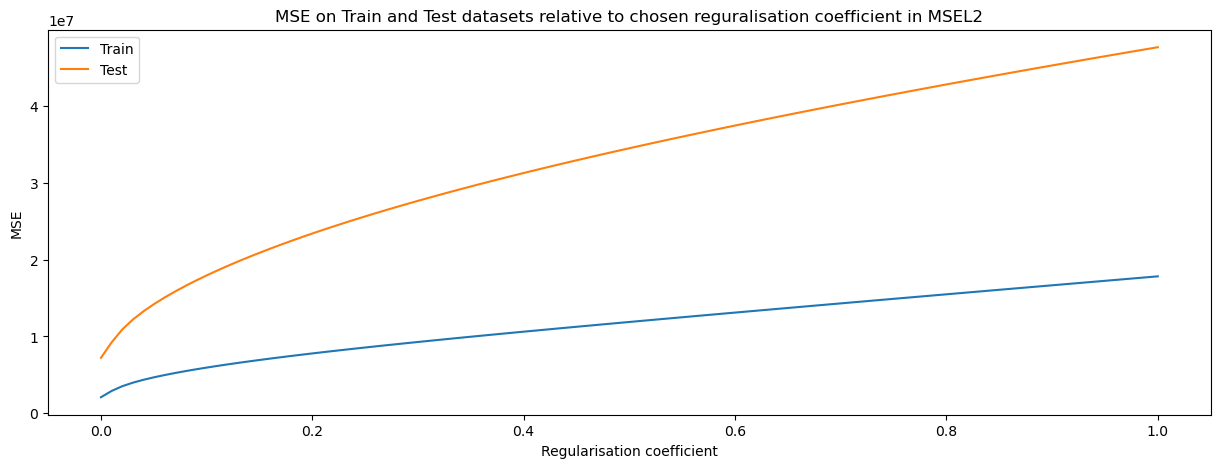

In [33]:
coefs = np.linspace(0.0001, 1, 100)
train_loss = []
test_loss = []

np.random.seed(42)
for c in coefs:
    model = LinearRegression(MSEL2Loss(c)).fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(15, 5))

plt.plot(coefs, train_loss, label='Train')
plt.plot(coefs, test_loss, label='Test')
plt.xlabel('Regularisation coefficient')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE on Train and Test datasets relative to chosen reguralisation coefficient in MSEL2')
plt.show()

In [34]:
np.random.seed(42)
opt_linreg = LinearRegression(MSEL2Loss(0.0001)).fit(X_train, y_train)
print(f'Optimal MSEL2Loss Train MSE = {mean_squared_error(y_train, opt_linreg.predict(X_train))}')
print(f'Optimal MSEL2Loss Test MSE = {mean_squared_error(y_test, opt_linreg.predict(X_test))}')

Optimal MSEL2Loss Train MSE = 2099332.9900756595
Optimal MSEL2Loss Test MSE = 7227493.0867076265


> Еще раз результаты работы для MSELoss:   
> `Train MSE = 1997765.4496064025`     
> `Test MSE = 6685700.643831783`  
> Результаты работы с регуляризацией L2 оказались хуже, чем без нее. Видимо модель переобучилась не так сильно, как предполагалось и штраф за большие принес больше вреда, чем пользы.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [35]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def phi_loss(self, z: float) -> float:
        if abs(z) < self.eps:
            return 0.5 * z ** 2
        else:
            return self.eps * (abs(z) - 0.5 * self.eps)

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        ans = 0
        for i in range(len(X)):
            ans += self.phi_loss(X[i].dot(w) - y[i])
        return ans / len(X)

    def phi_grad(self, z: float) -> float:
        if abs(z) < self.eps:
            return z
        else:
            return self.eps * np.sign(z)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        ans = np.zeros(X.shape[1])
        for i in range(len(X)):
            ans += X[i] * self.phi_grad(X[i].dot(w) - y[i])
        return ans / len(X)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

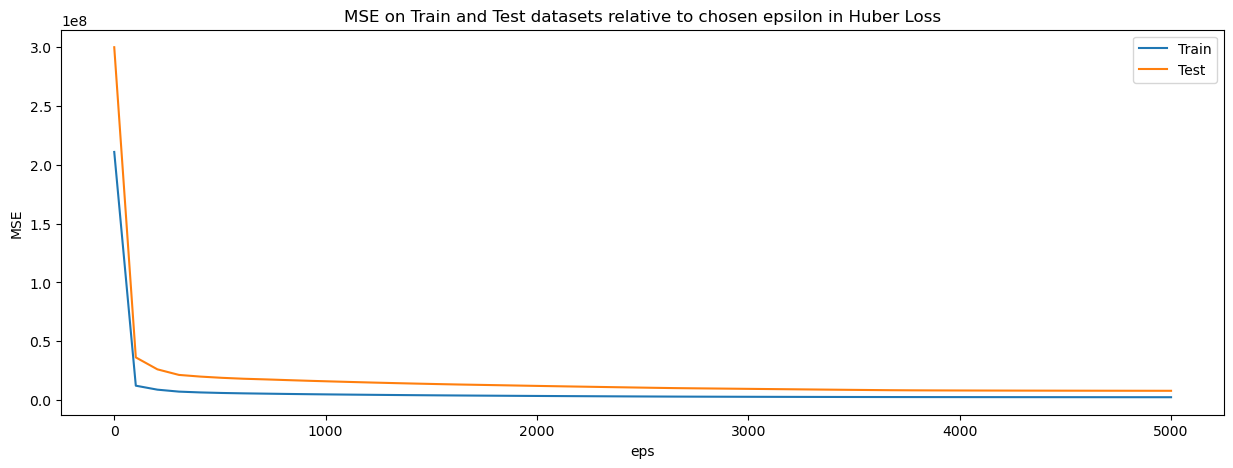

In [36]:
eps = np.linspace(0, 5000, 50)
train_loss = []
test_loss = []

np.random.seed(42)
for e in eps:
    model = LinearRegression(HuberLoss(e)).fit(X_train, y_train)
    train_loss.append(mean_squared_error(y_train, model.predict(X_train)))
    test_loss.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(15, 5))

plt.plot(eps, train_loss, label='Train')
plt.plot(eps, test_loss, label='Test')
plt.xlabel('eps')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE on Train and Test datasets relative to chosen epsilon in Huber Loss')
plt.show()

In [37]:
np.random.seed(42)
huber_linreg = LinearRegression(HuberLoss(5000)).fit(X_train, y_train)
print(f'Optimal Huber Loss Train MSE = {mean_squared_error(y_train, huber_linreg.predict(X_train))}')
print(f'Optimal Huber Loss Test MSE = {mean_squared_error(y_test, huber_linreg.predict(X_test))}')

Optimal Huber Loss Train MSE = 2521032.02463795
Optimal Huber Loss Test MSE = 7977119.882743101


> Еще раз результаты работы для MSELoss:   
> `Train MSE = 1997765.4496064025`     
> `Test MSE = 6685700.643831783`  
> И снова результаты только хуже. Скорее всего выбросов было не так много и новые штрафы нам опять же больше навредили, чем помогли.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

 joe biden

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [38]:
class SimulatedAnnealing:
    def __init__(self, energy: BaseLoss, n_iterations:int = 100000) -> None:
        self.energy = energy
        self.n_iterations = n_iterations

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'SimulatedAnnealing':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w = np.random.normal(-2, 2, X.shape[1])
        self.traj = [w]
        temp = 1
        for i in range(self.n_iterations):
            w_new = w + np.random.standard_t(3, size=w.shape)
            dE = self.energy.calc_loss(X, y, w_new) - self.energy.calc_loss(X, y, w)
            if dE < 0 or np.random.binomial(n=1, p=np.exp(-dE / temp)):
                w = w_new
            self.traj.append(w)
            temp -= 1/self.n_iterations
        self.w = w

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что модель обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Simulated Annealing must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X.dot(self.w)

In [39]:
np.random.seed(42)
sim_ann = SimulatedAnnealing(MSELoss()).fit(X_train, y_train)
print(f'Simulated Annealing Train MSE = {mean_squared_error(y_train, sim_ann.predict(X_train))}')
print(f'Simulated Annealing Test MSE = {mean_squared_error(y_test, sim_ann.predict(X_test))}')

Simulated Annealing Train MSE = 1543027.2682276824
Simulated Annealing Test MSE = 6186414.428137426


In [40]:
np.random.seed(42)

n_iterations = 50000

simple_traj = LinearRegression(MSELoss(), n_iterations).fit(X_train, y_train).traj
huber_traj = LinearRegression(HuberLoss(10000), n_iterations).fit(X_train, y_train).traj
simann_traj = SimulatedAnnealing(MSELoss(), n_iterations).fit(X_train, y_train).traj

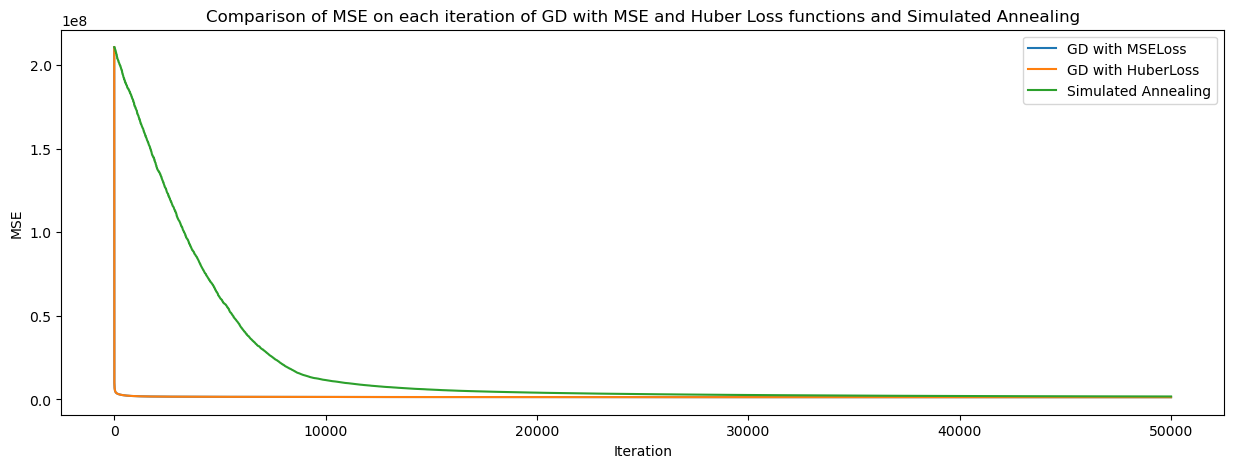

In [41]:
simple_loss = [0] * n_iterations
huber_loss = [0] * n_iterations
simann_loss = [0] * n_iterations
X_stacked = np.hstack([X_train, np.ones([X_train.shape[0], 1])])

iterations = range(n_iterations)

for i in iterations:
    simple_loss[i] = mean_squared_error(X_stacked.dot(simple_traj[i]), y_train)
    huber_loss[i] = mean_squared_error(X_stacked.dot(simple_traj[i]), y_train)
    simann_loss[i] = mean_squared_error(X_stacked.dot(simann_traj[i]), y_train)

plt.figure(figsize=(15, 5))
plt.plot(iterations, simple_loss, label='GD with MSELoss')
plt.plot(iterations, huber_loss, label='GD with HuberLoss')
plt.plot(iterations, simann_loss, label='Simulated Annealing')

plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.title('Comparison of MSE on each iteration of GD with MSE and Huber Loss functions and Simulated Annealing')
plt.show()

In [42]:
print(f'GD with MSELoss final MSE = {mean_squared_error(X_stacked.dot(simple_traj[-1]), y_train)}')
print(f'GD with HuberLoss final MSE = {mean_squared_error(X_stacked.dot(huber_traj[-1]), y_train)}')
print(f'Simulated Annealing final MSE = {mean_squared_error(X_stacked.dot(simann_traj[-1]), y_train)}')

GD with MSELoss final MSE = 1353528.530853476
GD with HuberLoss final MSE = 1398911.0072869
Simulated Annealing final MSE = 1804934.4205910645


> После 50 000 итераций наиболее эффективным алгоритмом оказался самый обычный градиентный спуск.   
> Градиентный спуск на основе Huber Loss показал результат чуть хуже, так как мы частично пожертвовали эффективностью ради борьбы с выбросами, которых по итогу оказалось не так много.   
> Алгоритм симуляции отжига также оказался довольно эффективным (причем обучение на 100 000 итераций в Datalore на AWS t2.medium заняло всего 5 секунд в сравнении с ~40 сек. на Huber Loss с циклами). Естественно из-за того, что алгоритм является стохастическим, идеального результата с его помощью добиться довольно тяжело, более того он катастрофически медленно сходится - градиентному спуску для этого потребовалось <1000 итераций, в то время как отжиг приближается к итоговому значению только где-то на 30000-ой итеарции. 